## Testing For final data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('Consumer_Complaints.csv')

# Print the first 5 rows of the data
df.head()

C:\Users\chels\AppData\Local\Temp\ipykernel_24548\731044942.py:6: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Consumer_Complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [3]:
# print the column names
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

<AxesSubplot:title={'center':'Number of complaints by product'}, xlabel='Product'>

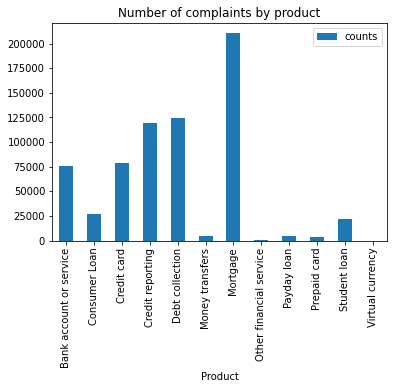

In [8]:
# group data by product and count the number of complaints
df_product = df.groupby('Product').size().reset_index(name='counts')

# graph the data
df_product.plot.bar(x='Product', y='counts', rot=90, title='Number of complaints by product')

<AxesSubplot:title={'center':'Number of complaints by company'}, xlabel='Company', ylabel='counts'>

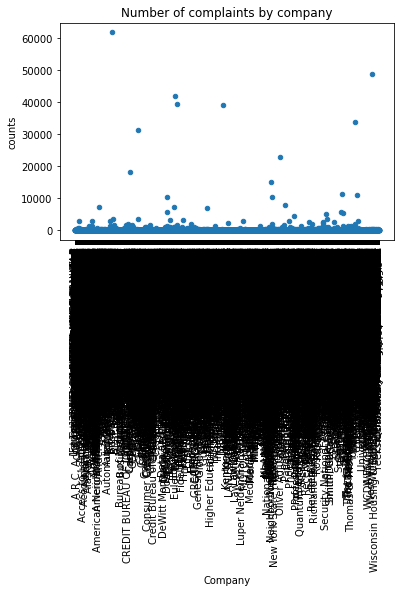

In [9]:
# graph a scatter plot of the number of complaints by company

# group data by company and count the number of complaints
df_company = df.groupby('Company').size().reset_index(name='counts')

# graph the data
df_company.plot.scatter(x='Company', y='counts', rot=90, title='Number of complaints by company')


<AxesSubplot:title={'center':'Number of complaints by type'}, xlabel='Issue'>

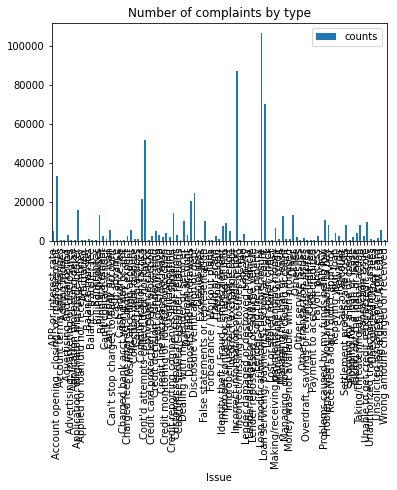

In [10]:
# graph the number of complaints by type

# group data by type and count the number of complaints
df_type = df.groupby('Issue').size().reset_index(name='counts')

# graph the data
df_type.plot.bar(x='Issue', y='counts', rot=90, title='Number of complaints by type')

<AxesSubplot:title={'center':'Number of complaints by date'}, xlabel='Date received'>

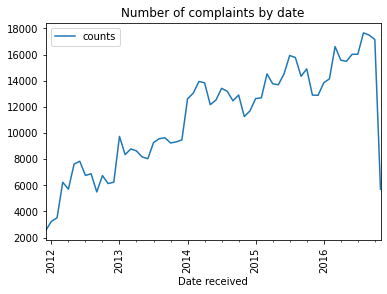

In [12]:
# group the data by date
# convert the date column to a datetime object
# group by month and count the number of complaints
df['Date received'] = pd.to_datetime(df['Date received'])
df_date = df.groupby(df['Date received'].dt.to_period('M')).size().reset_index(name='counts')

# graph the data
df_date.plot.line(x='Date received', y='counts', rot=90, title='Number of complaints by date')


In [14]:
# list the minimum and maximum dates
print('Min date: ', df_date['Date received'].min())
print('Max date: ', df_date['Date received'].max())

Min date:  2011-12
Max date:  2016-11


TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

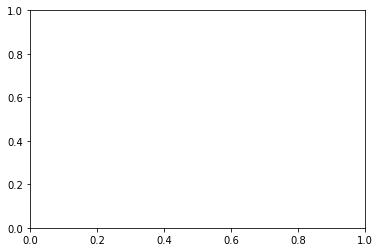

In [16]:
# graph how long it takes companies to respond to complaints
# 1. convert the date columns to datetime objects
# 2. subtract the date received from the date sent
# 3. group by company and take the average
# 4. graph the data

# convert the date columns to datetime objects
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# subtract the date received from the date sent
df['response_time'] = df['Date sent to company'] - df['Date received']

# group by company and take the average
df_response = df.groupby('Company')['response_time'].mean().reset_index(name='avg_response_time')

# graph the data
df_response.plot.bar(x='Company', y='avg_response_time', rot=90, title='Average response time by company')

In [19]:
# The number of unique issues
df['Issue'].nunique()


95

In [17]:
# count the number of companies
print('Number of companies: ', df_response['Company'].count())

Number of companies:  3933


In [18]:
# The number of unique products is
print('Number of products: ', df['Product'].nunique())

Number of products:  12


In [20]:
# The number of unique sub-issues
print('Number of sub-issues: ', df['Sub-issue'].nunique())

Number of sub-issues:  68


In [21]:
# The number of unique states is
print('Number of states: ', df['State'].nunique())

Number of states:  62
